4
鹿


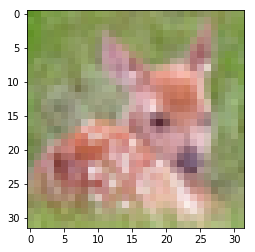

In [11]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.applications.vgg16 import VGG16


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_shp = x_train / 255
x_test_shp = x_test / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

labels = ["飛機", "汽車", "鳥", "貓", "鹿",
          "狗", "青蛙", "馬", "船", "卡車"]
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print(y_train[c][0])
print(labels[y_train[c][0]])
plt.imshow(x_train[c])


In [13]:
vgg = VGG16(include_top=False, input_shape=(32, 32, 3))
x = vgg.output
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
# x = Dense(1, activation="sigmoid")(x)
x = Dense(10, activation="softmax")(x)
cnn = Model(inputs=vgg.input, outputs=x)
for layer in vgg.layers:
    layer.trainable = False
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [14]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
result = cnn.fit(x_train_shp, y_train_cat, validation_split=0.1, epochs=10, batch_size=200, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 268s - loss: 1.1791 - acc: 0.5895 - val_loss: 1.1252 - val_acc: 0.6082
Epoch 2/10
 - 270s - loss: 1.0811 - acc: 0.6200 - val_loss: 1.0984 - val_acc: 0.6160
Epoch 3/10
 - 272s - loss: 0.9966 - acc: 0.6480 - val_loss: 1.1050 - val_acc: 0.6182
Epoch 4/10
 - 273s - loss: 0.9229 - acc: 0.6731 - val_loss: 1.0892 - val_acc: 0.6350
Epoch 5/10
 - 277s - loss: 0.8553 - acc: 0.6948 - val_loss: 1.0857 - val_acc: 0.6322
Epoch 6/10
 - 282s - loss: 0.7931 - acc: 0.7158 - val_loss: 1.1037 - val_acc: 0.6332
Epoch 7/10
 - 287s - loss: 0.7255 - acc: 0.7401 - val_loss: 1.1220 - val_acc: 0.6342
Epoch 8/10
 - 284s - loss: 0.6731 - acc: 0.7583 - val_loss: 1.1296 - val_acc: 0.6314
Epoch 9/10
 - 281s - loss: 0.6076 - acc: 0.7800 - val_loss: 1.1983 - val_acc: 0.6372
Epoch 10/10
 - 280s - loss: 0.5623 - acc: 0.7986 - val_loss: 1.2221 - val_acc: 0.6286


In [20]:
cnn.evaluate(x_test_shp, y_test_cat)

10000/10000 [==============================] - 56s 6ms/step


[1.255271682548523, 0.6238]